In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:
dataset=('E:/sentiment_ML_PROJECT/data/archive/testdata.csv')
columns = ["sentiment", "id", "date", "query", "user", "text"]
df = pd.read_csv(dataset, encoding='latin1', names=columns)

In [10]:
df.head()

,sentiment,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [12]:
df['sentiment'] = df['sentiment'].map({0: 0, 4: 1})
print(df.head())
print(df['sentiment'].value_counts())

   sentiment  id                          date    query      user  \
0        NaN   3  Mon May 11 03:17:40 UTC 2009  kindle2    tpryan   
1        NaN   4  Mon May 11 03:18:03 UTC 2009  kindle2    vcu451   
2        NaN   5  Mon May 11 03:18:54 UTC 2009  kindle2    chadfu   
3        NaN   6  Mon May 11 03:19:04 UTC 2009  kindle2     SIX15   
4        NaN   7  Mon May 11 03:21:41 UTC 2009  kindle2  yamarama   

                                                text  
0  @stellargirl I loooooooovvvvvveee my Kindle2. ...  
1  Reading my kindle2...  Love it... Lee childs i...  
2  Ok, first assesment of the #kindle2 ...it fuck...  
3  @kenburbary You'll love your Kindle2. I've had...  
4  @mikefish  Fair enough. But i have the Kindle2...  
sentiment
0.0    177
Name: count, dtype: int64


In [37]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [38]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
#lemmatizer = WordNetLemmatizer()

In [40]:
nltk.data.path.append("E:\sentiment_ML_PROJECT\data\nltk_data")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dell\AppData\Local\Temp\ipykernel_34020\2719659974.py:1: SyntaxWarning: invalid escape sequence '\s'
  nltk.data.path.append("E:\sentiment_ML_PROJECT\data\nltk_data")


In [73]:
nltk.download('punkt', download_dir='E:/sentiment_ML_PROJECT/data/nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     E:/sentiment_ML_PROJECT/data/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [93]:
import spacy

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization using spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc]

    # Further text processing...
    return ' '.join(tokens)


def preprocess_data(input_path, output_path):
    df = pd.read_csv(input_path, encoding='latin1', header=None)
    df.columns = ['target', 'id', 'date', 'query', 'user', 'text']
    
    # Apply the cleaning function to the 'text' column
    df['cleaned_text'] = df['text'].apply(preprocess_text)
    
    # Create a 'sentiment' column based on the target values
    df['sentiment'] = df['target'].apply(lambda x: 0 if x == 0 else 1)  # Binary sentiment (0 or 1)
    
    # Keep only the necessary columns
    df = df[['cleaned_text', 'sentiment']]
    
    # Save the cleaned data to a new CSV file
    df.to_csv(output_path, index=False)


In [90]:
input_path='E:/sentiment_ML_PROJECT/data/archive/testdata.csv'
input_path

'E:/sentiment_ML_PROJECT/data/archive/testdata.csv'

In [91]:
output_path='E:/sentiment_ML_PROJECT/data/processed/cleaned_tweets.csv'
output_path

'E:/sentiment_ML_PROJECT/data/processed/cleaned_tweets.csv'

In [92]:
preprocess_data(input_path,output_path)

C:\Users\Dell\AppData\Local\Temp\ipykernel_34020\4270170369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette="Set2")


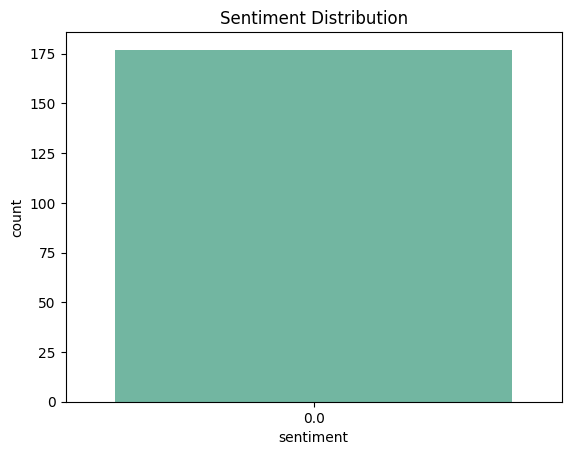

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot sentiment distribution
sns.countplot(data=df, x='sentiment', palette="Set2")
plt.title("Sentiment Distribution")
plt.show()


In [99]:
# Check the columns of the DataFrame
print(df.columns)

# Check the first few rows to ensure 'cleaned_text' exists
print(df.head())


Index(['sentiment', 'id', 'date', 'query', 'user', 'text'], dtype='object')
   sentiment  id                          date    query      user  \
0        NaN   3  Mon May 11 03:17:40 UTC 2009  kindle2    tpryan   
1        NaN   4  Mon May 11 03:18:03 UTC 2009  kindle2    vcu451   
2        NaN   5  Mon May 11 03:18:54 UTC 2009  kindle2    chadfu   
3        NaN   6  Mon May 11 03:19:04 UTC 2009  kindle2     SIX15   
4        NaN   7  Mon May 11 03:21:41 UTC 2009  kindle2  yamarama   

                                                text  
0  @stellargirl I loooooooovvvvvveee my Kindle2. ...  
1  Reading my kindle2...  Love it... Lee childs i...  
2  Ok, first assesment of the #kindle2 ...it fuck...  
3  @kenburbary You'll love your Kindle2. I've had...  
4  @mikefish  Fair enough. But i have the Kindle2...  


In [100]:
# Ensure that the preprocessing function is applied to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Check again if the 'cleaned_text' column exists
print(df.columns)
print(df.head())


Index(['sentiment', 'id', 'date', 'query', 'user', 'text', 'cleaned_text'], dtype='object')
   sentiment  id                          date    query      user  \
0        NaN   3  Mon May 11 03:17:40 UTC 2009  kindle2    tpryan   
1        NaN   4  Mon May 11 03:18:03 UTC 2009  kindle2    vcu451   
2        NaN   5  Mon May 11 03:18:54 UTC 2009  kindle2    chadfu   
3        NaN   6  Mon May 11 03:19:04 UTC 2009  kindle2     SIX15   
4        NaN   7  Mon May 11 03:21:41 UTC 2009  kindle2  yamarama   

                                                text  \
0  @stellargirl I loooooooovvvvvveee my Kindle2. ...   
1  Reading my kindle2...  Love it... Lee childs i...   
2  Ok, first assesment of the #kindle2 ...it fuck...   
3  @kenburbary You'll love your Kindle2. I've had...   
4  @mikefish  Fair enough. But i have the Kindle2...   

                                        cleaned_text  
0  @stellargirl i loooooooovvvvvveee my kindle2 ....  
1  reading my kindle2 ...   love it ... lee ch

In [101]:
df['text'] = df['text'].fillna('')  # Replace missing values with an empty string


In [103]:
print(df['sentiment'].value_counts())


sentiment
0.0    177
Name: count, dtype: int64


No positive text available for word cloud.


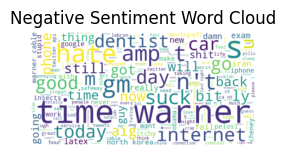

In [105]:
import wordcloud
from wordcloud import WordCloud
#df['text'] = df['text'].fillna('')
# Generate word cloud for positive sentiments
positive_text = " ".join(df[df['sentiment'] == 4]['cleaned_text'])
negative_text = " ".join(df[df['sentiment'] == 0]['cleaned_text'])
# Check for positive and negative text lengths
positive_text = " ".join(df[df['sentiment'] == 1]['cleaned_text'])
negative_text = " ".join(df[df['sentiment'] == 0]['cleaned_text'])

if len(positive_text) == 0:
    print("No positive text available for word cloud.")
else:
    # Create word cloud for positive sentiment
    positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

if len(negative_text) == 0:
    print("No negative text available for word cloud.")
else:
    # Create word cloud for negative sentiment
    negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

# Display the word clouds if they exist
import matplotlib.pyplot as plt

if len(positive_text) > 0:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Positive Sentiment Word Cloud")

if len(negative_text) > 0:
    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Negative Sentiment Word Cloud")

plt.show()




In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize text
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:
['bit', 'got', 'dentist', 'bobby', 'today', 'malcolm', 'gladwell', 'great', 'just', 'http']
Topic 2:
['just', 'warner', 'com', 'nike', 'gm', 'new', 'time', 'bit', 'ly', 'http']
Topic 3:
['internet', 'watching', 'just', 'new', 'good', 'kindle2', 'warner', 'time', 'museum', 'night']
Topic 4:
['got', 'lebron', 'hate', 'good', 'twitter', 'api', 'safeway', 'bit', 'ly', 'http']
Topic 5:
['ly', 'rt', 'bit', 'www', 'new', 'tinyurl', 'love', 'jquery', 'com', 'http']


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

In [131]:
df=pd.read_csv('E:\sentiment_ML_PROJECT\data\processed\cleaned_tweets.csv')
df = df.dropna(subset=['sentiment'])

# Ensure that the 'sentiment' column is of type integer (if not already)
df['sentiment'] = df['sentiment'].astype(int)

# Check for missing values in feature matrix X

# Vectorize text
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train = X_train.fillna(0)
print(y.value_counts())
if np.any(np.isnan(X_train.toarray())):
    print("NaN values found in the feature matrix!")
else:
    print("No NaN values in the feature matrix.")
from sklearn.impute import SimpleImputer
#X_train = X_train.fillna(0)
# Use SimpleImputer to fill NaN values (this works for both dense and sparse matrices)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dell\AppData\Local\Temp\ipykernel_34020\538053981.py:1: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_csv('E:\sentiment_ML_PROJECT\data\processed\cleaned_tweets.csv')


sentiment
1    321
0    177
Name: count, dtype: int64
No NaN values in the feature matrix.
              precision    recall  f1-score   support

           0       0.94      0.44      0.60        36
           1       0.76      0.98      0.86        64

    accuracy                           0.79       100
   macro avg       0.85      0.71      0.73       100
weighted avg       0.82      0.79      0.77       100



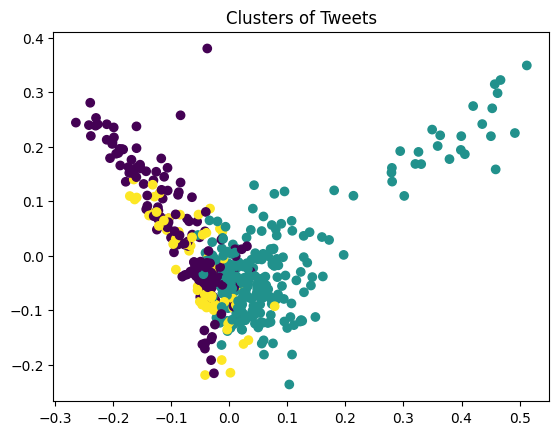

In [139]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title("Clusters of Tweets")
plt.show()
df.to_csv("E:/sentiment_ML_PROJECT/data/processed/clustered_data_tweets.csv", index=False)


In [137]:
df.columns

Index(['cleaned_text', 'sentiment'], dtype='object')

In [138]:
# Find top users contributing to each sentiment

top_users_positive = df[df['sentiment'] == 1].value_counts().head(10)
top_users_negative = df[df['sentiment'] == 0].value_counts().head(10)

print("Top Users for Positive Sentiments:")
print(top_users_positive)

print("Top Users for Negative Sentiments:")
print(top_users_negative)


Top Users for Positive Sentiments:
cleaned_text                                                                                                                                     sentiment
zomg ! ! ! i have a g2 ! ! ! ! ! ! !                                                                                                             1            1
warren buffet on the economy http://ping.fm/lau0p                                                                                                1            1
warren buffet became ( for a time ) the richest man in the united states , not by working but investing in 1 big idea which lead to the fortune  1            1
waiting in line at safeway .                                                                                                                     1            1
very interesting ad from adobe by goodby , silverstein & amp ; partners - youtube - adobe cs4 : le sens propre http://bit.ly/vprpt               1            1
using linu

In [141]:
import joblib
joblib.dump(model, "E:/sentiment_ML_PROJECT/models/sentiment_model_tweets.pkl")
joblib.dump(vectorizer, "E:/sentiment_ML_PROJECT/models/vectorizer_tweets.pkl")

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
